In [17]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [183]:
image = Image.open('word2.jpg').convert('L')
image = image.resize((80, 30), Image.Resampling.LANCZOS)

In [184]:
col_sum = np.sum(image, axis=0, keepdims=True)/255

In [185]:
col_sum.shape

(1, 80)

In [186]:
col_sum_2 = col_sum.shape[1] - col_sum

In [187]:
col_sum_2

array([[50.02745098, 51.47843137, 53.42745098, 54.24313725, 54.65490196,
        55.69803922, 56.13333333, 55.52941176, 55.21176471, 55.41176471,
        57.17254902, 60.32156863, 60.96470588, 59.19215686, 59.4745098 ,
        60.43921569, 59.7372549 , 57.46666667, 56.13333333, 56.11372549,
        56.86666667, 57.90196078, 59.4627451 , 60.43137255, 59.52156863,
        57.33333333, 54.04705882, 50.43137255, 50.18431373, 53.56862745,
        58.02745098, 60.79607843, 61.7372549 , 58.74901961, 55.32941176,
        54.09803922, 53.61176471, 53.21176471, 53.01176471, 54.41960784,
        56.30980392, 57.36078431, 58.14901961, 58.79607843, 60.03137255,
        60.44313725, 58.2627451 , 55.31372549, 51.0745098 , 50.04313725,
        50.02745098, 52.30588235, 57.59215686, 60.88627451, 63.37647059,
        61.61176471, 58.78431373, 57.64705882, 57.71764706, 59.35294118,
        59.90196078, 59.96862745, 60.03529412, 59.59607843, 58.31372549,
        55.89411765, 55.10588235, 55.1254902 , 55.0

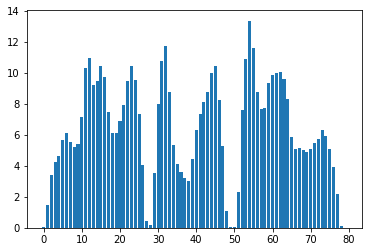

In [190]:
_ = plt.bar(np.arange(0,80), col_sum_2.ravel()-50)

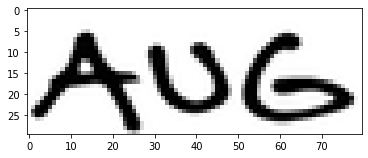

In [191]:
plt.imshow(image, cmap='gray')

In [192]:
_

<BarContainer object of 80 artists>

In [193]:
import cv2

In [573]:
input_image = cv2.imread('word3.jpg')

(194, 325, 3)

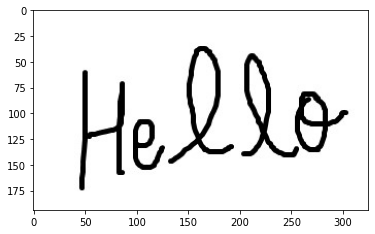

In [574]:
plt.imshow(input_image)
input_image.shape

In [575]:
grayImage= cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY).T

In [576]:
grayImage.shape

(325, 194)

In [577]:
GaussianFilter= cv2.GaussianBlur(grayImage, (5,5), 0)

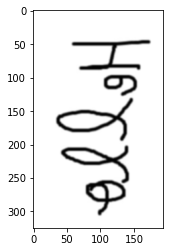

In [578]:
plt.imshow(GaussianFilter, cmap='gray')

In [579]:
_, binarizedImage = cv2.threshold(GaussianFilter, 240, 255, cv2.THRESH_BINARY)

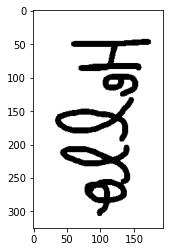

In [580]:
plt.imshow(binarizedImage, cmap='gray')

In [581]:
binarizedImage[binarizedImage == 0] = 1
binarizedImage[binarizedImage == 255] = 0

In [582]:
horizontal_projection = np.sum(binarizedImage, axis=1);
print(horizontal_projection);

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0  11  27  40 115 118 119 119 118 116 101  81
  67   9  10  10   9   9   9   8   9   9   8   8   9   9   9   8   8   9
   9   8   8   8   9   9   8  47  71  78  90  92  94  94  94  93  52  46
  30   0   0   0   0  26  34  39  42  45  47  49  50  50  31  29  28  27
  27  28  28  40  39  38  37  38  38  35  35  29  19  20  19  19  16  13
  11  10   6   0   5   7   7   9   9   9  10  10  10  10  11  10  11  12
  12  12  11  24  36  47  55  71  81  87  93  98  80  70  58  48  35  32
  31  33  35  37  38  38  40  41  42  42  46  50  55  77  73  69  66  62
  58  51  42  33   9   9  10  10  10  10  10   9   8   8   7   5   0   0
   0   0   0   5   7  34  42  48  54  60  62  65  67  69  45  44  45  48
  49  53  58  56  55  56  53  55  77  75  73  74  72  62  54  45  36  13
  12  11  11  10  10   9   9   9   9   8   9   9   

In [583]:
height, width = binarizedImage.shape
print('width : ', width)
print('height : ', height)

width :  194
height :  325


In [584]:
blankImage = np.zeros((height, width), np.uint8)

In [585]:
for row in range(height):
    cv2.line(blankImage, (0,row), (int(horizontal_projection[row]*0.8),row), (255), 1)

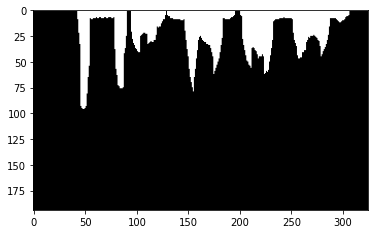

In [586]:
plt.imshow(blankImage.T, cmap='gray')

In [587]:
blankImage.shape

(325, 194)

In [588]:
blanksum = np.sum(blankImage, axis=1)

In [589]:
np.where(blanksum == 255)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  91,  92,  93,  94, 129, 196, 197, 198, 199,
        200, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
        319, 320, 321, 322, 323, 324], dtype=int64),)

In [591]:
im = Image.open('word3.jpg').convert('L')

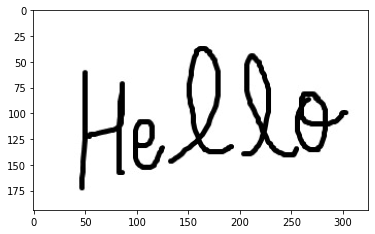

In [592]:
plt.imshow(im, cmap='gray')

In [620]:
new_im = np.array(im)

In [621]:
new_im = new_im[75:140, 252:307]

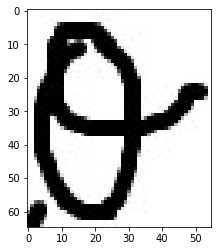

In [622]:
plt.imshow(new_im, cmap='gray')

In [623]:
Image.fromarray(new_im).resize((28,28), Image.Resampling.LANCZOS).save('o.jpg')